In [1]:
# Importing and naming packages/libraries to be used
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean.csv")

In [2]:
# Data Exploration / Cleaning / Wrangling  / Transformation

In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 'TotalCharge', 'Additional_charges'], axis=1)


In [5]:
# Checking for missing data
df.isnull().sum()

Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
Item1                 0
Item2                 0
Item3                 0
Item4                 0
Item5                 0
Item6                 0
Item7                 0
Item8                 0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

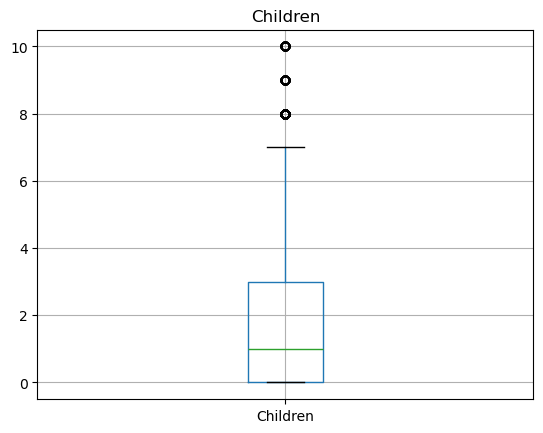

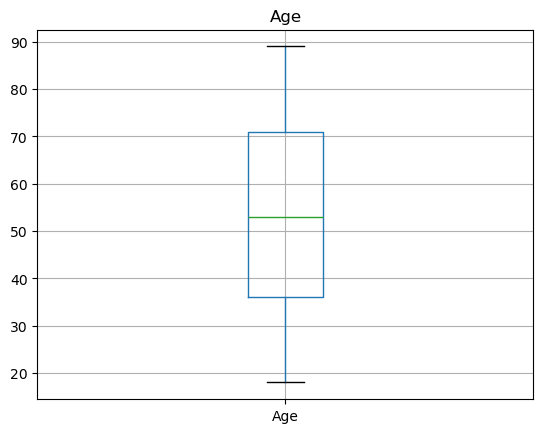

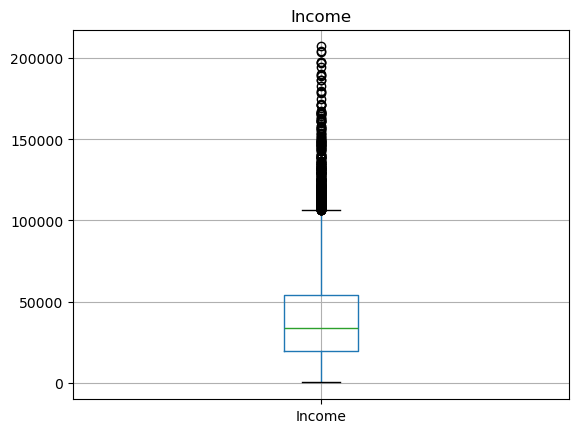

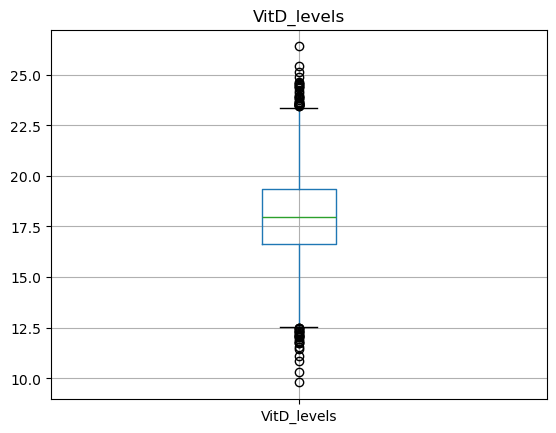

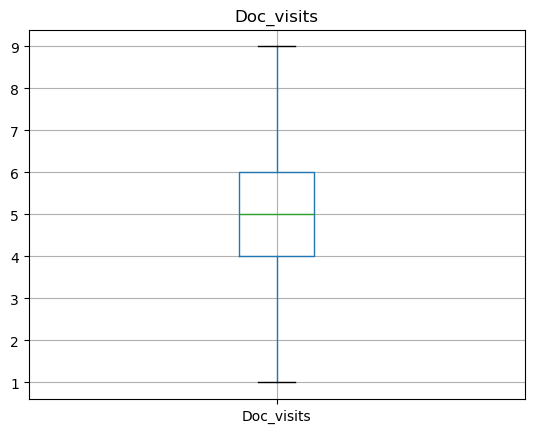

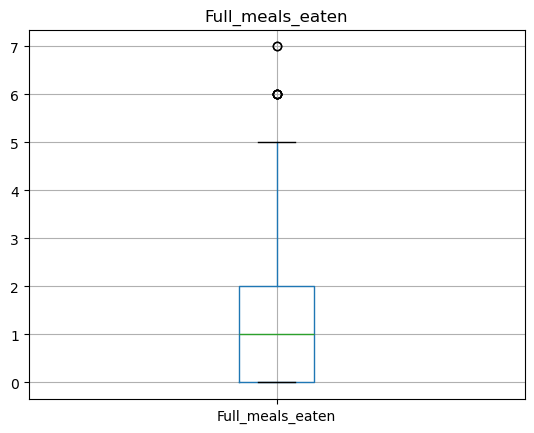

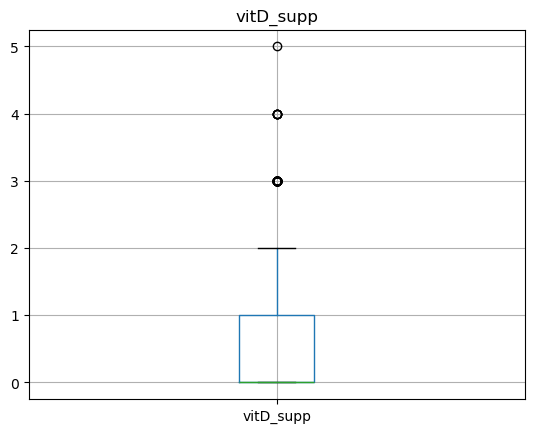

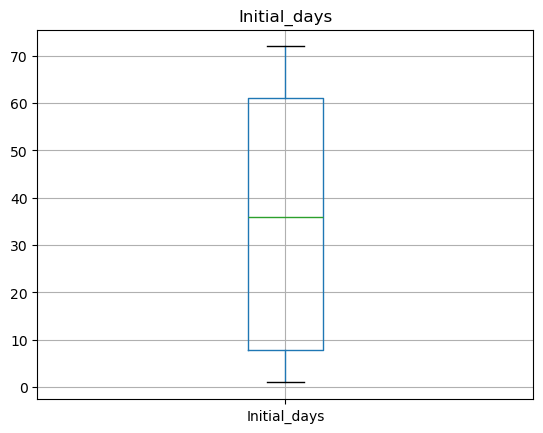

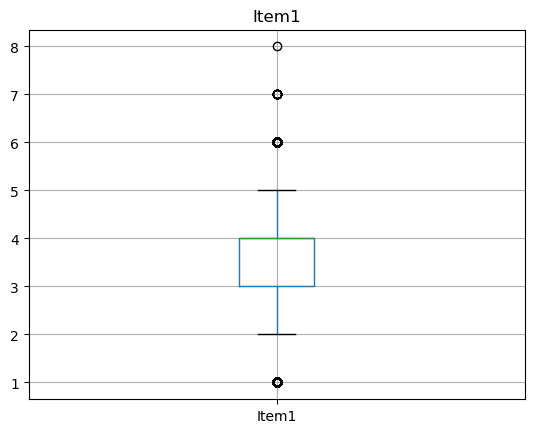

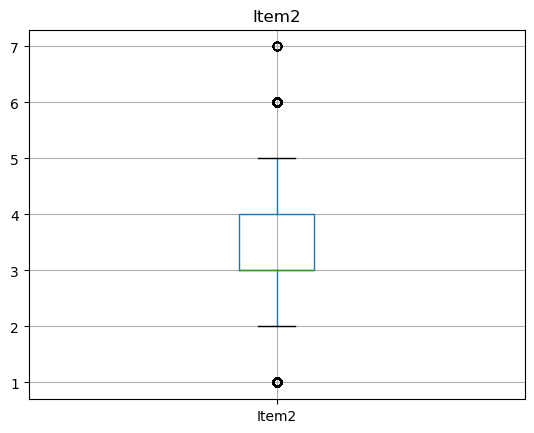

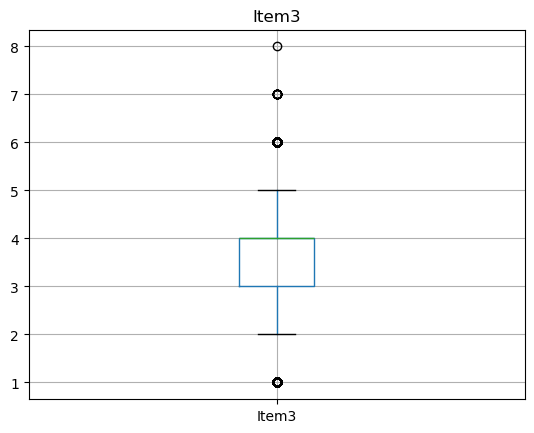

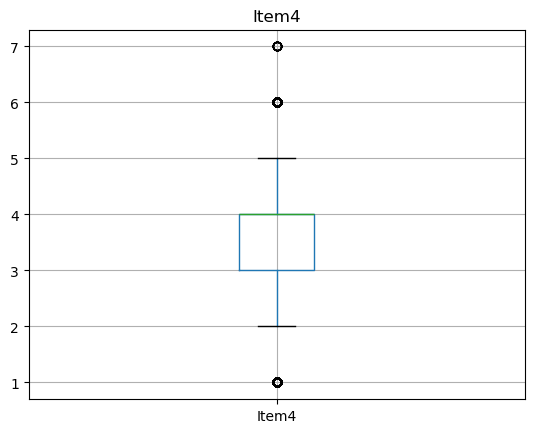

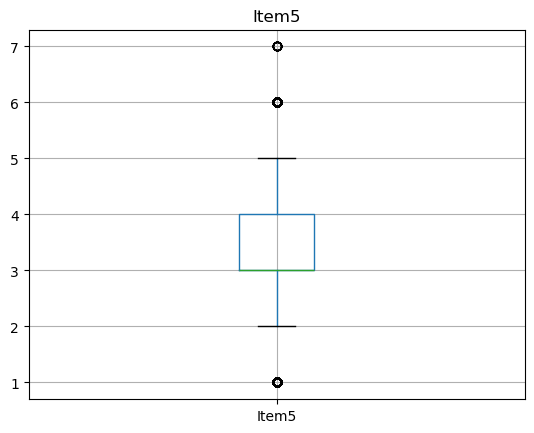

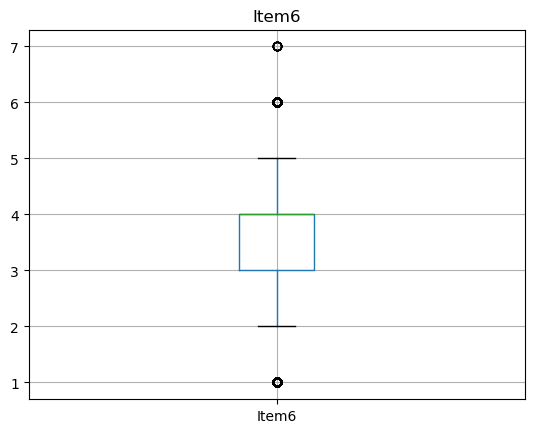

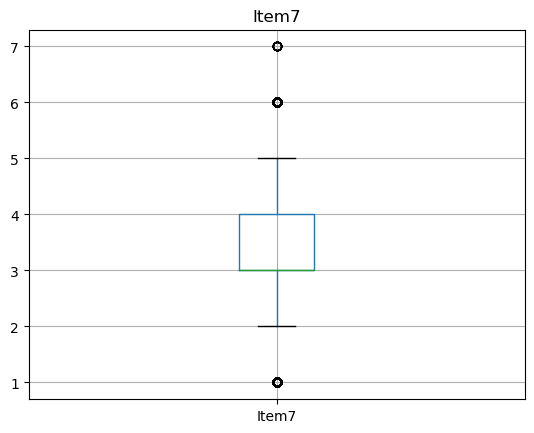

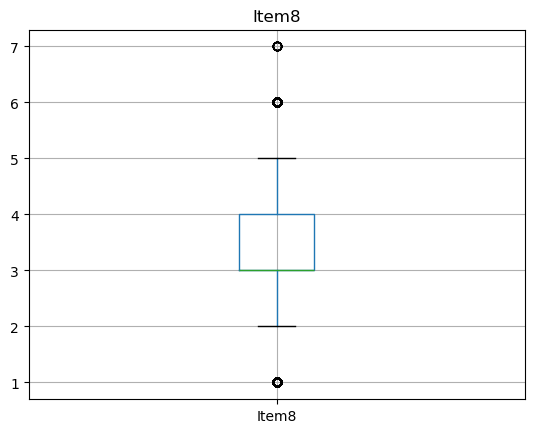

In [7]:
# Checking for outliers in quantitative variables

quant_columns = ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

In [8]:
# Random tree generator is robust to outliers.  Will not be removing outliers.

In [9]:
# Rename columns as needed

In [10]:
df = df.rename(columns={'vitD_supp': 'VitD_supp', 'Item1': 'Timely_admission', 'Item2': 'Timely_treatment', 'Item3': 'Timely_visits', 'Item4': 'Reliability', 'Item5': 'Options', 'Item6': 'Hours_of_treatment', 'Item7': 'Courteous_staff', 'Item8': 'Active_listening'})

In [11]:
# Quantitative type conversion 

In [12]:
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(int)

In [13]:
df['Children'] = df['Children'].astype(int)

In [14]:
# Reexpress booleans/categoricals into numeric values

In [15]:
df['ReAdmis'] = df['ReAdmis'].map({'Yes': '1', 'No': '0'})

In [16]:
df['Soft_drink'] = df['Soft_drink'].map({'Yes': '1', 'No': '0'})

In [17]:
df['HighBlood'] = df['HighBlood'].map({'Yes': '1', 'No': '0'})

In [18]:
df['Stroke'] = df['Stroke'].map({'Yes': '1', 'No': '0'})


In [19]:
df['Overweight'] = df['Overweight'].map({'Yes': '1', 'No': '0'})

In [20]:
df['Arthritis'] = df['Arthritis'].map({'Yes': '1', 'No': '0'})

In [21]:
df['Diabetes'] = df['Diabetes'].map({'Yes': '1', 'No': '0'})

In [22]:
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Yes': '1', 'No': '0'})

In [23]:
df['BackPain'] = df['BackPain'].map({'Yes': '1', 'No': '0'})

In [24]:
df['Anxiety'] = df['Anxiety'].map({'Yes': '1', 'No': '0'})

In [25]:
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map({'Yes': '1', 'No': '0'})

In [26]:
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map({'Yes': '1', 'No': '0'})

In [27]:
df['Asthma'] = df['Asthma'].map({'Yes': '1', 'No': '0'})

In [28]:
# Correlation

In [29]:
renamed_heatmap_columns = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'Timely_admission', 'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 'Courteous_staff', 'Active_listening']


<Axes: >

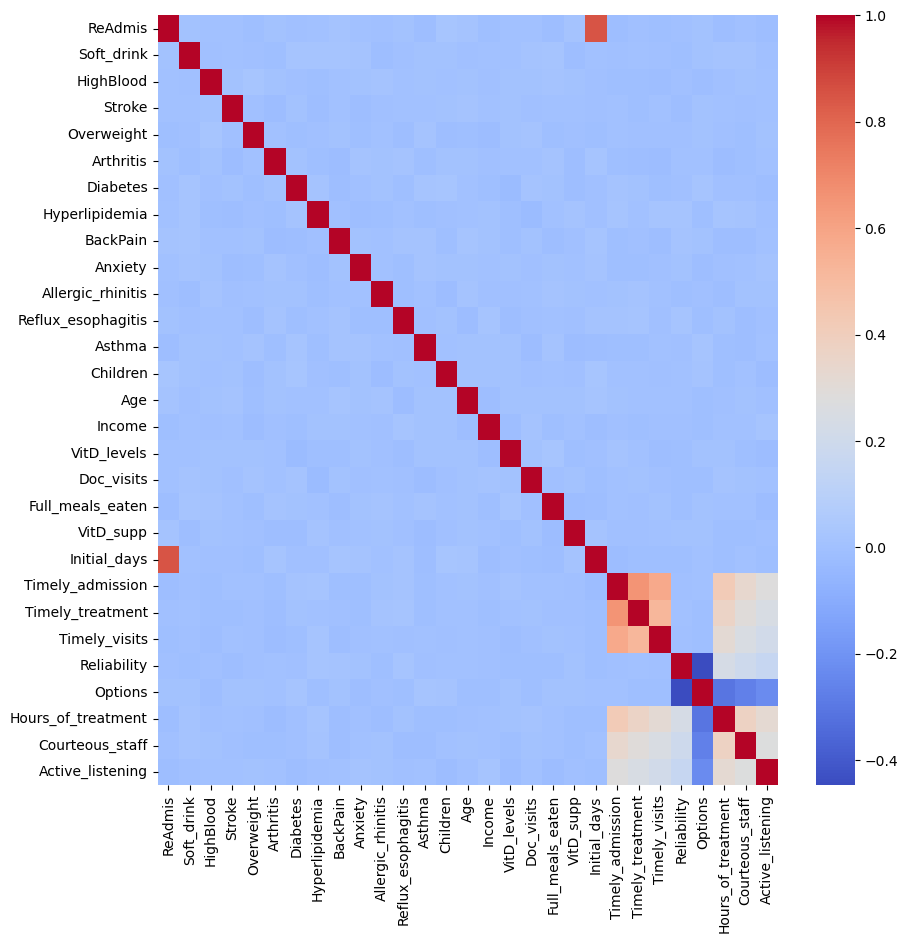

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(data=df[renamed_heatmap_columns].corr(), annot=False, cmap='coolwarm', ax=ax)

In [31]:
# Dummy variables

In [32]:
# Create dummy variables and adding to dataframe

In [33]:
# Area dummies
area_dummies = pd.get_dummies(df.Area, columns=['Rural', 'Urban'])

In [34]:
df.insert(1, 'Area_rural', area_dummies['Rural'])

In [35]:
df.insert(2, 'Area_urban', area_dummies['Urban'])

In [36]:
# Marital dummies
marital_dummies = pd.get_dummies(df.Marital, columns=['Divorced', 'Married', 'Widowed'])

In [37]:
df.insert(4, 'Marital_divorced', marital_dummies['Divorced'])

In [38]:
df.insert(5, 'Marital_married', marital_dummies['Married'])

In [39]:
df.insert(6, 'Marital_never_married', marital_dummies['Never Married'])

In [40]:
# Gender dummies
gender_dummies = pd.get_dummies(df.Gender, columns=['Male', 'Female'])

In [41]:
df.insert(7, 'Gender_male', gender_dummies['Male'])

In [42]:
df.insert(8, 'Gender_female', gender_dummies['Female'])

In [43]:
# Initial_admin dummies
initial_admin_dummies = pd.get_dummies(df.Initial_admin, columns=['Elective Admission', 'Emergency Admission'])

In [44]:
df.insert(25, 'Initial_admin_elective_admission', initial_admin_dummies['Elective Admission'])

In [45]:
df.insert(25, 'Initial_admin_emergency_admission', initial_admin_dummies['Emergency Admission'])

In [46]:
# Complication_risk dummies
complication_risk_dummies = pd.get_dummies(df.Complication_risk, columns=['High', 'Low'])

In [47]:
df.insert(28, 'Complication_risk_high', complication_risk_dummies['High'])

In [48]:
df.insert(29, 'Complication_risk_low', complication_risk_dummies['Low'])

In [49]:
# Services dummies
services_dummies = pd.get_dummies(df.Services, columns=['Blood Work', 'Intravenous', 'CT Scan'])
                    

In [50]:
df.insert(41, 'Services_blood_work', services_dummies['Blood Work'])

In [51]:
df.insert(41, 'Services_intravenous', services_dummies['Intravenous'])

In [52]:
df.insert(41, 'Services_ct_scan', services_dummies['CT Scan'])

In [53]:
# Map dummies to numerical values

In [54]:
df['Area_rural'] = df['Area_rural'].astype(int)

In [55]:
df['Area_urban'] = df['Area_urban'].astype(int)

In [56]:
df['Marital_divorced'] = df['Marital_divorced'].astype(int)

In [57]:
df['Marital_married'] = df['Marital_married'].astype(int)

In [58]:
df['Marital_never_married'] = df['Marital_never_married'].astype(int)

In [59]:
df['Gender_male'] = df['Gender_male'].astype(int)

In [60]:
df['Gender_female'] = df['Gender_female'].astype(int)

In [61]:
df['Initial_admin_elective_admission'] = df['Initial_admin_elective_admission'].astype(int)

In [62]:
df['Initial_admin_emergency_admission'] = df['Initial_admin_emergency_admission'].astype(int)

In [63]:
df['Complication_risk_high'] = df['Complication_risk_high'].astype(int)

In [64]:
df['Complication_risk_low'] = df['Complication_risk_low'].astype(int)

In [65]:
df['Services_blood_work'] = df['Services_blood_work'].astype(int)

In [66]:
df['Services_intravenous'] = df['Services_intravenous'].astype(int)

In [67]:
df['Services_ct_scan'] = df['Services_ct_scan'].astype(int)

In [68]:
# Drop variables used for dummies
df = df.drop(['Area', 'Marital', 'Gender', 'Initial_admin', 'Complication_risk', 'Services'], axis=1)


In [69]:
# Convert datatypes to int

In [70]:
df[['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Reflux_esophagitis', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Asthma']] = df[['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Reflux_esophagitis', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Asthma']].astype(int)
        

In [71]:
# SelectKBest process

In [72]:
X = df.drop(columns='Initial_days')

In [73]:
y = df.Initial_days

In [74]:
# SelectKBest and fit
skbest = SelectKBest(k='all') 
X_new = skbest.fit_transform(X,y)

In [75]:
# Determining p-values / listing < .05
p_values = pd.DataFrame({'Feature': X.columns, 'p_value': skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < 0.05]

,Feature,p_value
20,Initial_admin_emergency_admission,0.0
3,Marital_divorced,0.0
6,Gender_male,0.0
7,Gender_female,0.0
22,Diabetes,0.0
21,Initial_admin_elective_admission,0.0
10,ReAdmis,0.0
34,Services_ct_scan,0.0
27,Anxiety,0.0
17,Stroke,0.0


In [76]:
# Variables to keep (<.05 p-value)
features_to_keep = p_values['Feature'][p_values['p_value'] < 0.05]
print(features_to_keep)

20    Initial_admin_emergency_admission
3                      Marital_divorced
6                           Gender_male
7                         Gender_female
22                             Diabetes
21     Initial_admin_elective_admission
10                              ReAdmis
34                     Services_ct_scan
27                              Anxiety
17                               Stroke
15                           Soft_drink
Name: Feature, dtype: object


In [77]:
# Check VIFs

In [78]:
X_refined = df[['Initial_admin_emergency_admission', 'Marital_divorced', 'Gender_male', 'Gender_female', 'Diabetes', 'Initial_admin_elective_admission', 'ReAdmis', 'Services_ct_scan', 'Anxiety', 'Stroke', 'Soft_drink']]

In [79]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]
vif['variable'] = X_refined.columns
vif

,VIF,variable
0,2.922843,Initial_admin_emergency_admission
1,1.235484,Marital_divorced
2,3.299114,Gender_male
3,3.386532,Gender_female
4,1.369152,Diabetes
5,1.949632,Initial_admin_elective_admission
6,1.563602,ReAdmis
7,1.139556,Services_ct_scan
8,1.460567,Anxiety
9,1.243132,Stroke


In [80]:
# Cleaned Data Set
df = X
df.insert(15, 'Initial_days', y)

In [81]:
# Create .csv
df.to_csv('cleand209datatask2.csv', index=False)


In [82]:
# ### END OF DATA TRANSFORMATION

D1: Split Data

In [84]:
# Load clean data set
df = pd.read_csv("C:/Users/Owner/cleand209datatask2.csv")

In [85]:
# Separate variables

In [86]:
X = df[['Initial_admin_emergency_admission', 'Marital_divorced', 'Gender_male', 'Gender_female', 'Diabetes', 'Initial_admin_elective_admission', 'ReAdmis', 'Services_ct_scan', 'Anxiety', 'Stroke', 'Soft_drink']]

In [87]:
y = df['Initial_days']

In [88]:
# Split Data

In [89]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.8, test_size=.2, random_state=12)

In [90]:
# Output to .csvs

In [91]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

D2:  Perform RandomForestRegressor

In [93]:
# Identify optimal value for parameters using hyperparemetric tuning
# (Course Materials, 2024)

In [94]:
parameters = {"n_estimators": [10,50,100], "max_features": [2,3,4], "max_depth": [8,None]}


In [95]:
# Instantiate the RandomForestRegressor

In [96]:
forest = RandomForestRegressor(random_state=22)

In [97]:
# perform grid search
gridsearch = GridSearchCV(forest, parameters)

In [98]:
# fit model on training data
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=22),
             param_grid={'max_depth': [8, None], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100]})

In [99]:
# Visual

In [100]:
# (Plonski, 2024)

In [101]:
# Fit classifier
forest.fit(X,y)

RandomForestRegressor(random_state=22)

<function matplotlib.pyplot.show(close=None, block=None)>

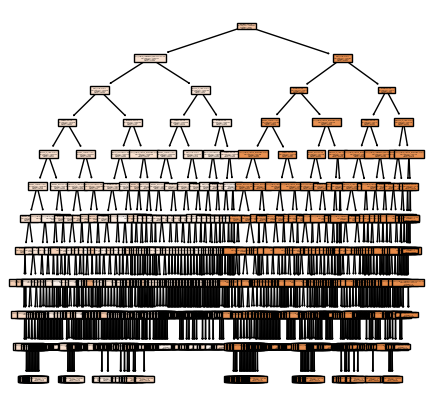

In [102]:
# Visualize an individual tree
plt.figure(figsize=(5,5))
plot_tree(forest.estimators_[0], feature_names=X.columns, filled=True)
plt.show

In [103]:
print("Depth for Random Forest Visual: ", forest.estimators_[0].tree_.max_depth)

Depth for Random Forest Visual:  11


In [104]:
# Values

In [105]:
# Check scores from training data
y_train_pred = gridsearch.predict(X_train)
print("Best params: ", gridsearch.best_params_)
print("Training - MSE: ", gridsearch.best_score_)
print("Training - RMSE: ", (gridsearch.best_score_)**.5)
print("Training - R-squared: ", r2_score(y_train, y_train_pred))

Best params:  {'max_depth': 8, 'max_features': 4, 'n_estimators': 50}
Training - MSE:  0.7234885949261931
Training - RMSE:  0.850581327637865
Training - R-squared:  0.7400434811068886


In [106]:
# Check prediction accuracy for testing data
y_pred = gridsearch.predict(X_test)

In [107]:
print("Testing - MSE: ", mean_squared_error(y_test, y_pred))
print("Testing - RMSE: ", mean_squared_error(y_test, y_pred)**.5)
print("Testing - R-squared: ", r2_score(y_test, y_pred))

Testing - MSE:  205.08776937677897
Testing - RMSE:  14.320885774866685
Testing - R-squared:  0.7016024674001335


In [108]:
# (Course Materials, 2024)
# Create a pd.Series of features importances

In [109]:
importances = pd.Series(data=gridsearch.best_estimator_.feature_importances_, index=X_train.columns)


In [110]:
# Sort importances
importances_sorted = importances.sort_values()
print(importances_sorted)

Gender_female                        0.001789
Gender_male                          0.001890
Initial_admin_elective_admission     0.002085
Initial_admin_emergency_admission    0.002571
Services_ct_scan                     0.002875
Stroke                               0.002892
Diabetes                             0.003012
Soft_drink                           0.003041
Marital_divorced                     0.003235
Anxiety                              0.003408
ReAdmis                              0.973203
dtype: float64


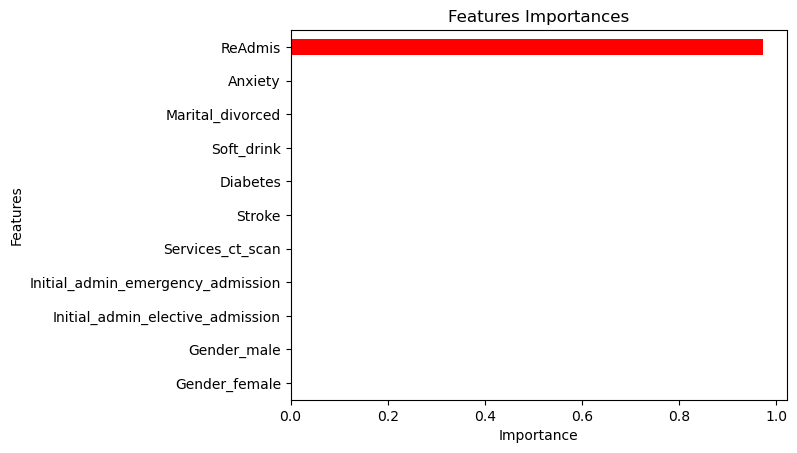

In [111]:
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='red')
plt.title('Features Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()